In [1]:
import torch
from torch import nn
from matplotlib import pyplot as plt
from torch.distributions.multivariate_normal import MultivariateNormal

%matplotlib inline

In [3]:
class GaussianProcess(nn.Module):
    def __init__(self, mean, lengthscale):
        super(GaussianProcess, self).__init__()
        self.ls=lengthscale
        self.mean=mean

    def covar_matrix(self,x):
        return torch.exp(-torch.cdist(x,x,p=2)/(2*self.ls**2))
    
    def log_prob(self,inputs,f):
        GP_inputs=MultivariateNormal(loc=self.mean*torch.ones(inputs.shape[0]),covariance_matrix=self.covar_matrix(inputs))
        return GP_inputs.log_prob(f)
    def forward(self, inputs, n=1):
        GP_inputs=MultivariateNormal(loc=self.mean*torch.ones(inputs.shape[0]),covariance_matrix=self.covar_matrix(inputs))
        return GP_inputs.sample((n,)).squeeze()
    

In [4]:
GP=GaussianProcess(mean=torch.tensor(0.),lengthscale=1.)

torch.Size([100, 100])

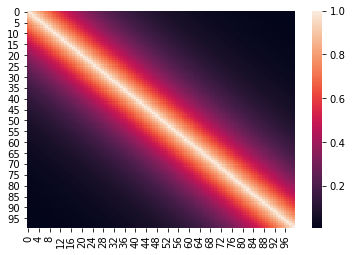

In [5]:
inputs=torch.linspace(-5,5,100).unsqueeze(-1)
import seaborn as sns

sns.heatmap(GP.covar_matrix(inputs))
GP.covar_matrix(inputs).shape




In [6]:
f=GP(inputs,100)
GP.log_prob(inputs,f)

tensor([-25.9182, -29.4041, -39.4062, -25.5028, -31.8717, -26.7120, -28.3251,
        -20.9996, -23.9512, -25.4737, -26.0789, -19.5450, -22.3589, -33.9514,
        -37.7604, -17.1531, -17.5586, -23.5834, -25.4537, -38.9004, -23.7928,
        -13.8144, -17.7346, -18.5937, -23.2360, -30.8307, -24.2347, -43.2015,
        -28.7255, -24.5751, -30.5211, -23.2583, -14.3813, -18.6112, -22.8321,
        -43.7989, -27.4305, -23.4191, -19.9447, -36.2703, -22.2337, -18.0442,
        -33.6768, -20.6604, -33.3539, -16.9554, -21.2523, -26.9238, -22.8979,
        -36.7843, -21.5232, -28.4622, -27.9436, -20.9135, -17.3433, -34.5267,
        -27.7221, -22.8162, -22.5390, -21.2461, -17.7073, -23.0787, -17.1164,
        -27.4072, -22.4343, -23.9197, -27.0377, -14.8104, -20.0847, -27.7303,
        -44.0446, -21.7273, -36.2667, -16.7572, -24.8051, -22.4948, -47.8552,
        -28.0103, -26.2397, -24.5106,  -9.5452, -21.1676, -33.7321, -29.9689,
        -24.9607, -22.3054, -27.0473, -35.7584, -31.9999, -28.37

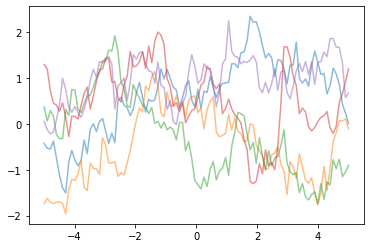

In [7]:
for i in range(5):
    plt.plot(inputs,GP(inputs),alpha=0.5)

In [8]:
GP=GaussianProcess(mean=torch.tensor(0.),lengthscale=1.)

torch.Size([100, 100])

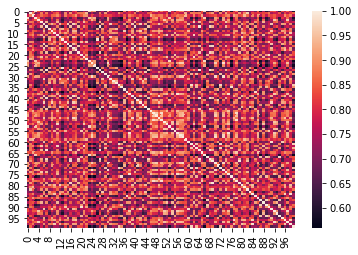

In [9]:
N=2
inputs=torch.rand(100,N)
import seaborn as sns

sns.heatmap(GP.covar_matrix(inputs))
GP.covar_matrix(inputs).shape




In [10]:
f=GP(inputs,10)
GP.log_prob(inputs,f)

tensor([21.0181, 16.9113, 15.2751,  7.2530, 13.0467, 14.5788, 19.0012, -2.1476,
        14.8725,  2.1601])

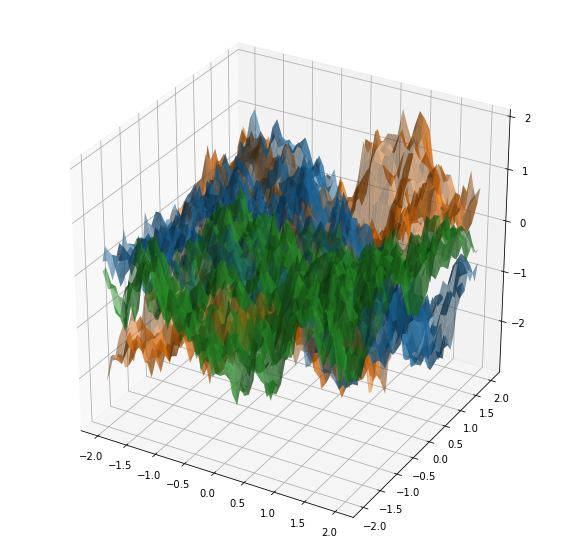

In [11]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
n=50
X=torch.linspace(-2,2,n)
XX,YY = torch.meshgrid(X,X)#torch.cartesian_prod(X, X)
XX_=torch.stack([XX,YY],dim=2).view(n**2,-1)
for i in range(3):
    ax.plot_surface(XX.numpy(),YY.numpy(),GP(XX_).view(n,n).numpy(),alpha=0.5)